In [2]:
import pickle

with open ('/kaggle/input/processed-uci/processed.pkl', 'rb') as f:
    df=pickle.load(f)
    

In [3]:
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_1.0,...,slope_1.0,slope_2.0,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,0.936181,1.0,0.750380,-0.276443,1.0,0.017494,0.0,1.068965,0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.378929,1.0,1.596266,0.744555,0.0,-1.816334,1.0,0.381773,2,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1.378929,1.0,-0.659431,-0.353500,0.0,-0.899420,1.0,1.326662,1,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-1.941680,1.0,-0.095506,0.051047,0.0,1.633010,0.0,2.099753,0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-1.498933,0.0,-0.095506,-0.835103,0.0,0.978071,0.0,0.295874,0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


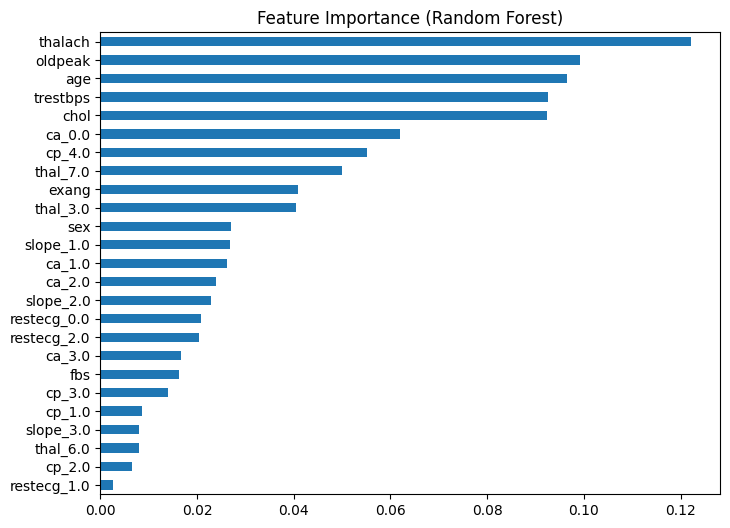

In [4]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
x=df.drop('target', axis=1)
y=df['target']


rf=RandomForestClassifier(random_state=42)
rf.fit(x,y)

importances=rf.feature_importances_
feature_imps=pd.Series(importances, index=x.columns)
feature_imps=feature_imps.sort_values()

feature_imps.plot(kind="barh", figsize=(8,6))
plt.title("Feature Importance (Random Forest)")
plt.show()

In [5]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=200)
rfe=RFE(model,n_features_to_select=5)

rfe.fit(x,y)

selected=pd.Series(rfe.support_, index=x.columns)

print('Selected Features: ', x.columns[selected.values])


Selected Features:  Index(['cp_4.0', 'slope_1.0', 'ca_0.0', 'thal_3.0', 'thal_7.0'], dtype='object')


In [11]:
from sklearn.model_selection import cross_val_score
rf_features = ["thalach", "oldpeak", "age", "trestbps", "chol", "ca_0.0", "cp_4.0", "thal_7.0","thal_3.0"]


rfe_features = ["cp_4.0", "slope_1.0", "ca_0.0", "thal_3.0", "thal_7.0"]
scores_rfe = cross_val_score(model, x[rfe_features], y, cv=5)

print("RF features accuracy:", scores_rf.mean())
print("RFE features accuracy:", scores_rfe.mean())


RF features accuracy: 0.612598870056497
RFE features accuracy: 0.5790395480225989


In [7]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

X_scaled = MinMaxScaler().fit_transform(x)

chi_scores, p_values = chi2(X_scaled, y)

chi2_df = pd.DataFrame({"Feature": x.columns, "Chi2 Score": chi_scores, "p-value": p_values})
print(chi2_df.sort_values("Chi2 Score", ascending=False))


        Feature  Chi2 Score       p-value
24     thal_7.0   46.644612  1.808239e-09
11       cp_4.0   42.638819  1.229648e-08
22     thal_3.0   39.744674  4.887927e-08
6         exang   39.119182  6.582518e-08
20       ca_2.0   33.865361  7.941005e-07
18       ca_0.0   32.319788  1.645742e-06
21       ca_3.0   29.263719  6.909948e-06
15    slope_1.0   27.180490  1.827655e-05
16    slope_2.0   21.414294  2.620573e-04
10       cp_3.0   20.404160  4.155197e-04
9        cp_2.0   16.518950  2.396304e-03
7       oldpeak   15.887988  3.173210e-03
19       ca_1.0   15.246267  4.216774e-03
23     thal_6.0   10.982280  2.676388e-02
1           sex    7.511646  1.111968e-01
12  restecg_0.0    7.309516  1.204081e-01
4           fbs    6.778461  1.480690e-01
13  restecg_1.0    6.418458  1.700012e-01
14  restecg_2.0    5.933221  2.041912e-01
17    slope_3.0    5.297864  2.580769e-01
8        cp_1.0    5.001386  2.871554e-01
5       thalach    3.194716  5.257848e-01
0           age    1.244537  8.707

In [8]:
#thal_7.0,cp_4.0,thal_3.0,oldpeak, thalach, age,trestbps, chol